In [66]:
%matplotlib inline

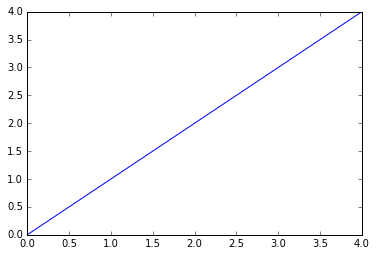

In [67]:
plot(arange(5))

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [69]:
df = pd.read_csv("//OHFS07/Home/dbasak/My Documents/Analytics Vidhya/Loans Data/train.csv") #Reading the dataset in a dataframe using Pandas

In [70]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [71]:
df.describe()

C:\Users\dbasak\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [72]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

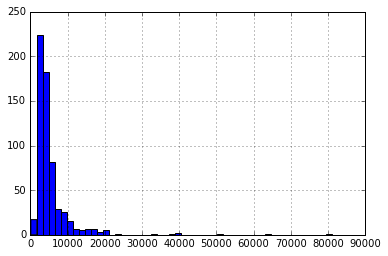

In [73]:
df['ApplicantIncome'].hist(bins=50)

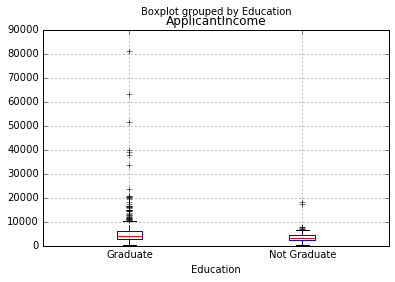

In [74]:
df.boxplot(column='ApplicantIncome', by='Education')

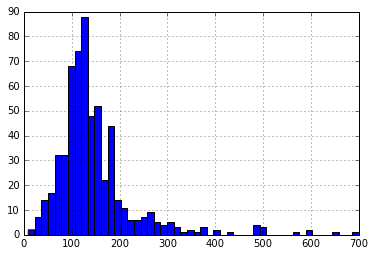

In [75]:
df['LoanAmount'].hist(bins=50)

C:\Users\dbasak\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xdd140b8>],
 'caps': [<matplotlib.lines.Line2D at 0xdd1aa58>,
 'fliers': [<matplotlib.lines.Line2D at 0xdd1fbe0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xdd1f3c8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xdd14ac8>,
  <matplotlib.lines.Line2D at 0xdd14be0>]}

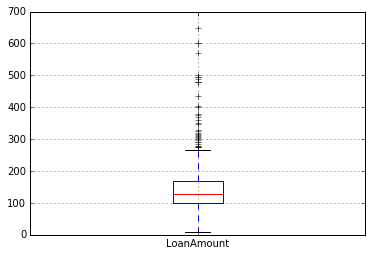

In [76]:
df.boxplot(column='LoanAmount')

In [77]:
return_type='dict'

In [78]:
temp1 = df['Credit_History'].value_counts(ascending=True)

In [79]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [80]:
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [81]:
print ('Frequency Table for Credit History:')
print (temp1)
print ('\nProbability of getting loan for each credit class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


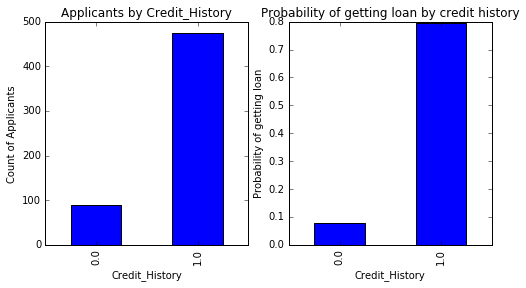

In [82]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

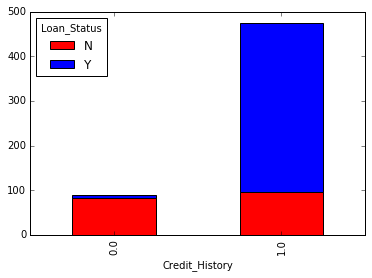

In [83]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [84]:
#Data Munging - Check for missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

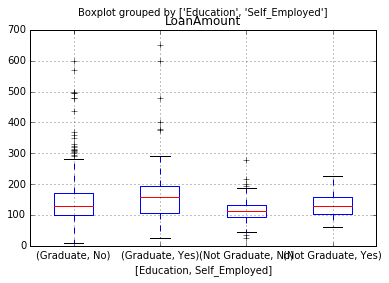

In [85]:
#Imputing missing value for Self-Employed
#A key hypothesis is that whether a person is educated or self-employed can combine to give a good estimate of loan amount.

#First lets see the distribution of loan amount by Education and Self-Employed
df.boxplot(column='LoanAmount', by=['Education','Self_Employed'])


In [86]:
#Hence we can see that the median varies between all 4 groups and this can be used to impute values for loanAmount.
#However, as we saw earlier, Self_Employed itself has missing values. We need to impute that first.

#Let’s look at the frequency table of Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [87]:
#Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success.
df['Self_Employed'].fillna('No',inplace=True)

In [88]:
#Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
#define a function to return value of this pivot table

def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

#df.apply(fage, axis=1)

#replace missing values

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

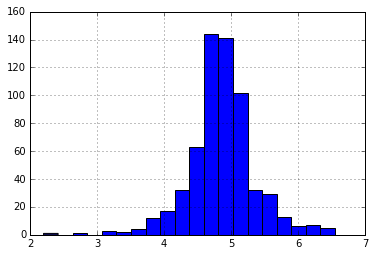

In [89]:
#How to treat outliers in distribution of LoanAmount and ApplicantIncome
#Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. 
#So instead of treating them as outliers, let’s try a log transformation to nullify their effect
df.apply(lambda x: sum(x.isnull()),axis=0) 
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

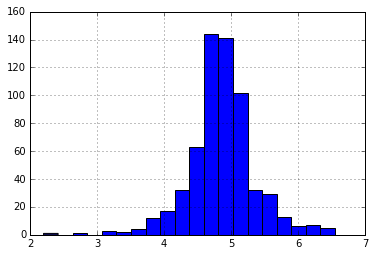

In [90]:
#Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. 
#So it might be a good idea to combine both incomes as total income and take a log transformation of the same

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [91]:
#Next we will impute missing values for Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [92]:
#Since 81% of the customers are Male, we can safely impute misssing Gender values as Male
df['Gender'].fillna('Male', inplace=True)

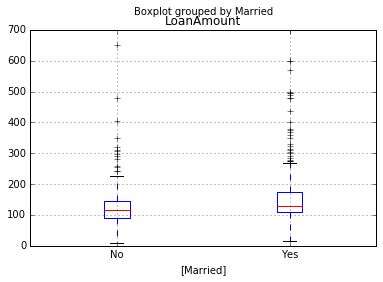

In [93]:
#Similarly we will impute missing value of Married
df['Married'].value_counts()
df.boxplot(column='LoanAmount', by=['Married'])

#Since Married population is almost 2 times that of unmarried population and the median 
#value of loan amount doesnot differ by a large amount between the two groups, we will impute the missing values for Married as Yes
df['Married'].fillna('Yes', inplace=True)

In [94]:
#Now we will observe the distribution of Dependents
df['Dependents'].value_counts()
#df.groupby(['Married', 'Dependents']).apply(pd.DataFrame.mode).reset_index(drop=True)
df.pivot_table(values='Dependents', index=['Married', 'Education'], aggfunc=pd.DataFrame.mode)

Married  Education      
No       Graduate      0    0
         Not Graduate  0    0
Yes      Graduate      0    0
         Not Graduate  0    0
Name: Dependents, dtype: object

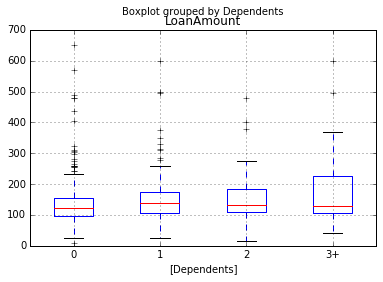

In [95]:
df.boxplot(column=['LoanAmount'], by=['Dependents'])
df['Dependents'].fillna('0', inplace=True)

In [96]:
# Crosstab of Loan_Status and Credit_History
pd.crosstab(index=df["Loan_Status"], columns=df["Credit_History"])

# From the below crosstab we can see that majority of customers whose Loan_Status is approved have a Credit_History. 
# For those whose Loan_Status is not approved, almost equal proportion have a credit history of 0 and 1. 

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


In [97]:
# We'll check the distribution of Loan_Status for records with missing Credit_History. 
df_subset = df[df['Credit_History'].isnull()]
pd.crosstab(index=df_subset["Loan_Status"], columns="Count")

# Since only 13 records have Loan Status as N, for these records we'll replace the NaNs with the mode in this group
# For rest of the records, based on popularity measures, we'll assign 1 to NaNs.

df['Credit_History'].fillna('1.0', inplace=True)

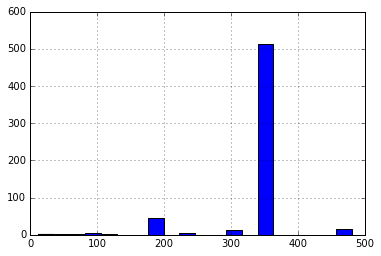

In [98]:
df['Loan_Amount_Term'].hist(bins=20)

In [99]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )

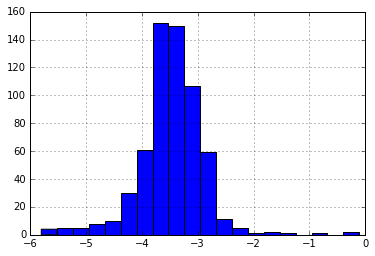

In [113]:
#Feature Engineering - Creating dti ratio i.e. debt to income ratio to identify the credibility of the customer
df['dti'] = df['LoanAmount']/df['ApplicantIncome']
df['dti_log'] = np.log(df['dti'])
df['dti_log'].hist(bins=20)

In [114]:
#building Predictive Model
#Converting categorical columns into numeric columns 

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype('str'))
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dti                  float64
dti_log              float64
dtype: object

In [115]:
#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" %  "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    
        # Filter training data
        train_predictors = data[predictors].iloc[train,:]
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [116]:
# Logistic regression model:

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [117]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area','dti_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [119]:
#Lets try Decision Tree. It is considered to provide better accuracy than LR
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [120]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log','dti_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 73.136%


In [125]:
#Random Forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.178%


In [123]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.262895
TotalIncome_log     0.191371
dti_log             0.182191
LoanAmount_log      0.161091
Property_Area       0.043273
Dependents          0.040010
Loan_Amount_Term    0.038816
Married             0.025519
Education           0.022388
Gender              0.016257
Self_Employed       0.016189
dtype: float64


In [130]:
#Let’s use the top 5 variables for creating a model. Also, we will modify the parameters of random forest model a little bit
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area','dti_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.410%
Cross-Validation Score : 80.133%
